# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [31]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    #image += [0.0, 0.0, 0.0]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [32]:
from utils import get_train_input

In [33]:
train_dataset = get_train_input("./experiments/experiment0/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segment-11379226

INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/train/segment-10625026498155904401_200_000_220_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-11588853832866011756_2184_462_2204_462_with_camera_labels.tfrecord', '/app/project/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/app/project/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1172406780360799916_1660_000_1680_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord', '/app/project/data/train/segme

INFO:tensorflow:Number of filenames to read: 86


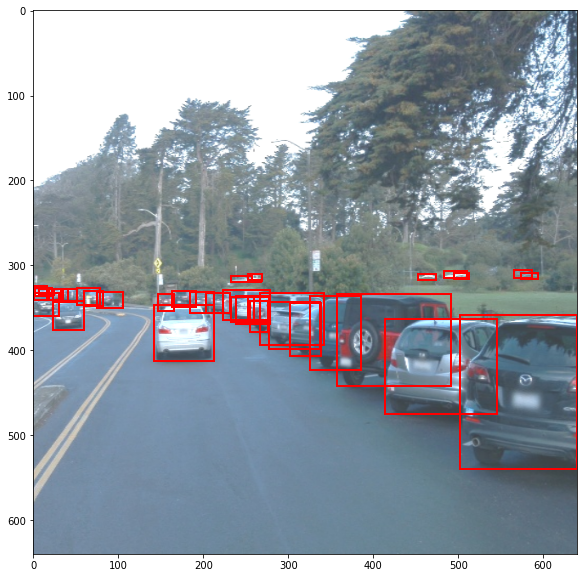

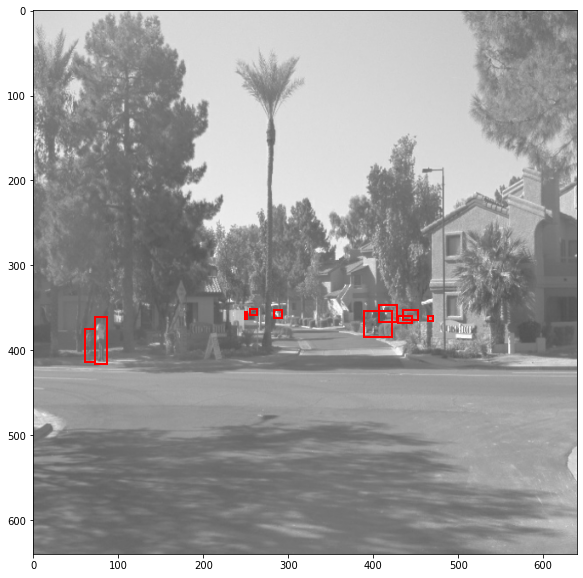

In [34]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)